In [58]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt

In [59]:
cd D:\STUDY\SEM3 - summer\Programming for Data Science

D:\STUDY\SEM3 - summer\Programming for Data Science


In [61]:
hprice = pd.read_csv('hprice1.csv')

In [62]:
hprice.shape

(88, 10)

In [63]:
hprice.head

<bound method NDFrame.head of       price  assess  bdrms  lotsize  sqrft  colonial    lprice   lassess  \
0   300.000   349.1      4     6126   2438         1  5.703783  5.855359   
1   370.000   351.5      3     9903   2076         1  5.913503  5.862210   
2   191.000   217.7      3     5200   1374         0  5.252274  5.383118   
3   195.000   231.8      3     4600   1448         1  5.273000  5.445875   
4   373.000   319.1      4     6095   2514         1  5.921578  5.765504   
5   466.275   414.5      5     8566   2754         1  6.144775  6.027073   
6   332.500   367.8      3     9000   2067         1  5.806640  5.907539   
7   315.000   300.2      3     6210   1731         1  5.752573  5.704449   
8   206.000   236.1      3     6000   1767         0  5.327876  5.464255   
9   240.000   256.3      3     2892   1890         0  5.480639  5.546349   
10  285.000   314.0      4     6000   2336         1  5.652489  5.749393   
11  300.000   416.5      5     7047   2634         1  5.70

In [65]:
hprice.groupby(['colonial']).mean()

,price,assess,bdrms,lotsize,sqrft,lprice,lassess,llotsize,lsqrft
colonial,,,,,,,,,
0,272.370370,303.922222,3.185185,8806.703704,1957.259259,5.551281,5.674914,8.873684,7.531518
1,302.918869,320.965574,3.737705,9114.213115,2038.672131,5.669431,5.737062,8.919012,7.590798


In [66]:
hprice.groupby(['bdrms']).mean()

,price,assess,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
bdrms,,,,,,,,,
2,251.250000,292.125000,12802.250000,1572.250000,0.000000,5.517506,5.658681,9.355248,7.333385
3,261.979167,280.602381,6848.857143,1809.928571,0.642857,5.548610,5.623769,8.755052,7.481255
4,285.163667,319.703030,9945.151515,2085.242424,0.787879,5.613984,5.734544,8.917036,7.619867
5,518.003571,507.014286,16135.571429,3024.428571,0.857143,6.205942,6.200701,9.519052,7.997836
6,310.000000,253.600000,5348.000000,1386.000000,1.000000,5.736572,5.535758,8.584478,7.234177
7,477.500000,478.100000,8400.000000,3529.000000,1.000000,6.168564,6.169820,9.035987,8.168770


In [68]:
hprice['sqrft_cuts'] = pd.cut(hprice['sqrft'],[1000,1500,2000,2500,3000,3500,4000])
hprice.groupby(['sqrft_cuts']).mean()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
sqrft_cuts,,,,,,,,,,
"(1000, 1500]",234.090909,240.909091,3.000000,8183.000000,1361.909091,0.454545,5.446359,5.479268,8.892085,7.213911
"(1500, 2000]",246.145022,269.222222,3.422222,8055.777778,1752.222222,0.688889,5.485615,5.588246,8.754384,7.465718
"(2000, 2500]",315.531250,341.306250,3.500000,8447.562500,2191.375000,0.875000,5.746203,5.828812,8.985069,7.690657
"(2500, 3000]",381.852500,428.920000,4.200000,10245.000000,2680.200000,0.700000,5.930052,6.047347,9.043147,7.893054
"(3000, 3500]",559.250000,544.700000,4.000000,20234.000000,3353.000000,1.000000,6.287035,6.279145,9.830199,8.117589
"(3500, 4000]",548.750000,545.075000,5.250000,15786.500000,3701.000000,0.500000,6.285848,6.286911,9.509008,8.215773


In [173]:
def sstats(data):
    df = (data.mean(),data.std(),data.isnull().sum())
    df = pd.concat(df,axis=1)
    df.columns = ['mean','std','is null']
    return(df)
sstats(hprice)

,mean,std,is null
assess,315.736364,95.314437,0
bdrms,3.568182,0.841393,0
colonial,0.693182,0.463816,0
costly,0.352273,0.480416,0
lassess,5.717994,0.262113,0
llotsize,8.905105,0.544060,0
lotsize,9019.863636,10174.150414,0
lprice,5.633180,0.303573,0
lsqrft,7.572610,0.258688,0
price,293.546034,102.713445,0


In [67]:
dummies = pd.get_dummies(hprice['bdrms'])
dummies

,2,3,4,5,6,7
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
5,0,0,0,1,0,0
6,0,1,0,0,0,0
7,0,1,0,0,0,0
8,0,1,0,0,0,0
9,0,1,0,0,0,0


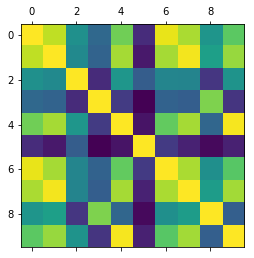

In [148]:
plt.matshow(hprice.corr())

In [160]:
model1 = smf.ols('price~bdrms+lotsize+sqrft+colonial',data=hprice).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     43.25
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           1.45e-19
Time:                        19:32:54   Log-Likelihood:                -482.41
No. Observations:                  88   AIC:                             974.8
Df Residuals:                      83   BIC:                             987.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.1265     29.603     -0.815      0.417     -83.007      34.754
bdrms         11.0043      9.515      1.156      0.251      -7.921      29.930
lotsize        0.0021      0.001      3.230      0.002       0.001       0.003
sqrft          0.1242      0.013      9.314      0.000       0.098       0.151
colonial      13.7155     14.637      0.937      0.351     -15.397      42.828
==============================================================================
Omnibus:                       24.904   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.677
Skew:                           1.091   Prob(JB):                     1.21e-10
Kurtosis:                       5.774   Cond. No.                     6.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
model2 = smf.ols('price~bdrms+lotsize+sqrft',data=hprice).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     57.46
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           2.70e-20
Time:                        19:33:15   Log-Likelihood:                -482.88
No. Observations:                  88   AIC:                             973.8
Df Residuals:                      84   BIC:                             983.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.7703     29.475     -0.739      0.462     -80.385      36.844
bdrms         13.8525      9.010      1.537      0.128      -4.065      31.770
lotsize        0.0021      0.001      3.220      0.002       0.001       0.003
sqrft          0.1228      0.013      9.275      0.000       0.096       0.149
==============================================================================
Omnibus:                       20.398   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.278
Skew:                           0.961   Prob(JB):                     9.79e-08
Kurtosis:                       5.261   Cond. No.                     6.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
model3 = smf.ols('price~ bdrms',data=hprice).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     29.93
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           4.34e-07
Time:                        19:33:36   Log-Likelihood:                -518.84
No. Observations:                  88   AIC:                             1042.
Df Residuals:                      86   BIC:                             1047.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.2311     41.553      1.738      0.086     -10.374     154.836
bdrms         62.0246     11.338      5.470      0.000      39.485      84.564
==============================================================================
Omnibus:                       30.731   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.141
Skew:                           1.253   Prob(JB):                     1.60e-15
Kurtosis:                       6.508   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
model5 = smf.ols('price~lsqrft',data=hprice).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     110.8
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           3.95e-17
Time:                        19:57:37   Log-Likelihood:                -495.56
No. Observations:                  88   AIC:                             995.1
Df Residuals:                      86   BIC:                             1000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1962.4197    214.467     -9.150      0.000   -2388.766   -1536.073
lsqrft       297.9113     28.305     10.525      0.000     241.643     354.180
==============================================================================
Omnibus:                       33.290   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.813
Skew:                           1.425   Prob(JB):                     1.88e-15
Kurtosis:                       6.221   Cond. No.                         227.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
model6 = smf.ols('price~bdrms+llotsize+lsqrft+(lsqrft:llotsize)',data=hprice).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     55.54
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           1.07e-22
Time:                        19:38:34   Log-Likelihood:                -474.69
No. Observations:                  88   AIC:                             959.4
Df Residuals:                      83   BIC:                             971.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        8102.4680   2595.197      3.122      0.002    2940.725    1.33e+04
bdrms              13.2927      8.325      1.597      0.114      -3.265      29.850
llotsize        -1058.1408    286.288     -3.696      0.000   -1627.556    -488.725
lsqrft          -1095.9087    338.617     -3.236      0.002   -1769.404    -422.413
lsqrft:llotsize   146.2012     37.355      3.914      0.000      71.904     220.499
==============================================================================
Omnibus:                       15.895   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.996
Skew:                           0.766   Prob(JB):                     6.16e-06
Kurtosis:                       5.049   Cond. No.                     3.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [171]:
hprice['costly'] = (hprice['price']>300).astype(int)
hprice['costly']
#model12 = smf.logit('costly~colonial+bdrms+lotsize+sqrft',data=hprice).fit()
#model12.summary()
model8 = smf.glm('costly~colonial+bdrms+llotsize+lsqrft',family=sm.families.Binomial(),data=hprice).fit()
model8.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 costly   No. Observations:                   88
Model:                            GLM   Df Residuals:                       83
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -33.150
Date:                Thu, 28 Jun 2018   Deviance:                       66.300
Time:                        19:35:26   Pearson chi2:                     85.2
No. Iterations:                     6                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -68.2880     15.952     -4.281      0.000     -99.553     -37.023
colonial      -0.3482      0.755     -0.461      0.644      -1.827       1.131
bdrms          0.7472      0.497      1.505      0.132      -0.226       1.720
llotsize       1.6098      0.730      2.204      0.028       0.178       3.041
lsqrft         6.7118      1.940      3.459      0.001       2.909      10.514
==============================================================================
"""

[  7.           7.001001     7.002002   ... 420.27404998 420.57225945
 420.87046893]


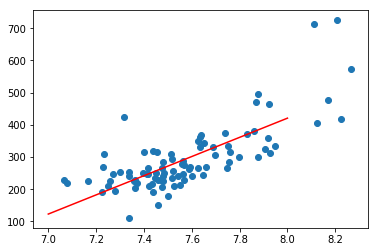

In [201]:
plt.figure()
plt.scatter(hprice['lsqrft'],hprice['price'])
x = np.linspace(7,8,1000)
y = model5.predict(pd.DataFrame({'lsqrft':x}))
print(np.hstack((x,y)))
plt.plot(x,y, c = 'red')